<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
data = pd.read_csv("/Users/drewmayes/Desktop/MDST/data/states_edu.csv")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
data.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<AVG_MATH_8_SCORE>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [4]:
len(data['YEAR'].unique())

33

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [5]:
print("Max for Michigan: ", max(data[data['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE']))
print("Max for Ohio: ", max(data[data['STATE'] == 'OHIO']['AVG_MATH_8_SCORE']))

Max for Michigan:  280.0
Max for Ohio:  290.0


Find the average for your pedictor score across all states in 2019

In [6]:
np.mean(data[data['YEAR'] == 2019]['AVG_MATH_8_SCORE'])

281.2641509433962

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [7]:
for state in data['STATE'].unique():
    print("Max for ", state, " ", max(data[data["STATE"]  == state]['AVG_MATH_8_SCORE']))

Max for  ALABAMA   269.0
Max for  ALASKA   nan
Max for  ARIZONA   283.0
Max for  ARKANSAS   279.0
Max for  CALIFORNIA   277.0
Max for  COLORADO   292.0
Max for  CONNECTICUT   289.0
Max for  DELAWARE   284.0
Max for  DISTRICT_OF_COLUMBIA   269.0
Max for  FLORIDA   281.0
Max for  GEORGIA   281.0
Max for  HAWAII   281.0
Max for  IDAHO   287.0
Max for  ILLINOIS   nan
Max for  INDIANA   288.0
Max for  IOWA   286.0
Max for  KANSAS   nan
Max for  KENTUCKY   282.0
Max for  LOUISIANA   273.0
Max for  MAINE   289.0
Max for  MARYLAND   288.0
Max for  MASSACHUSETTS   301.0
Max for  MICHIGAN   280.0
Max for  MINNESOTA   295.0
Max for  MISSISSIPPI   274.0
Max for  MISSOURI   286.0
Max for  MONTANA   nan
Max for  NEBRASKA   288.0
Max for  NEVADA   nan
Max for  NEW_HAMPSHIRE   296.0
Max for  NEW_JERSEY   296.0
Max for  NEW_MEXICO   274.0
Max for  NEW_YORK   283.0
Max for  NORTH_CAROLINA   286.0
Max for  NORTH_DAKOTA   293.0
Max for  OHIO   290.0
Max for  OKLAHOMA   279.0
Max for  OREGON   nan
Max for 

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [8]:
features = ['TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE','TOTAL_EXPENDITURE', 
            'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
            'CAPITAL_OUTLAY_EXPENDITURE','AVG_MATH_8_SCORE']

Final feature list: **<'TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE','TOTAL_EXPENDITURE', 
            'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
            'CAPITAL_OUTLAY_EXPENDITURE','AVG_MATH_8_SCORE'>**

Feature selection justification: **<I chose to look at all numeric variables that I thought might play a role in the response variable I was looking at (average math 8 score)>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

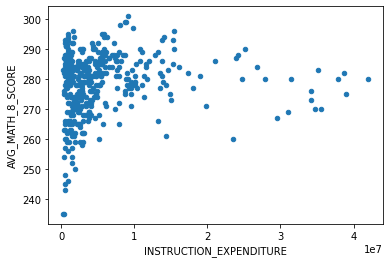

In [9]:
data.plot.scatter(x="INSTRUCTION_EXPENDITURE", y="AVG_MATH_8_SCORE")

**<Math 8 Score by Instruction Expenditure>**

**Visualization 2**

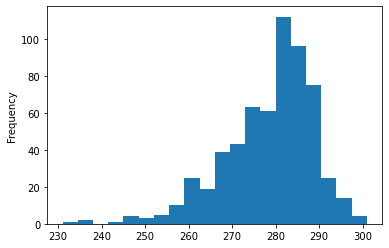

In [10]:
data["AVG_MATH_8_SCORE"].plot.hist(bins=20)

**<Frequency of math 8 scores>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data[features].dropna()
y = data.loc[X.index]['AVG_MATH_8_SCORE']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [14]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [15]:
# create your model here
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = model.predict(X_test)

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

Text(0, 0.5, 'AVG_MATH_8_SCORE')

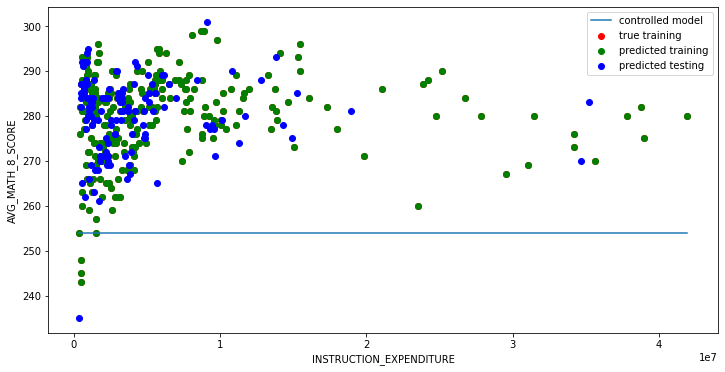

In [19]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')

<h2> Summary </h2>

**<I ran a simple linear regression model to predict the average 8th grade math scores using a variety of numerical variables inluding various quantities of revenue and expenditures. The model performed decently well for the weak strength of the original data points.>**